In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Define the column labels corresponding to the dataset attributes.
column_names = [
    'Sex', 
    'Length', 
    'Diameter', 
    'Height', 
    'Whole weight', 
    'Shucked weight', 
    'Viscera weight', 
    'Shell weight', 
    'Rings'
]

# Read the .data file into a DataFrame.
df = pd.read_csv('../abalone/abalone.data', header=None, names=column_names)

# Map the 'Sex' values to numerical values.
sex_mapping = {'M': 0, 'F': 1, 'I': 2}
df['Sex'] = df['Sex'].map(sex_mapping)

# Define predictors (features) and target variable.
X = df.drop('Rings', axis=1)
y = df['Rings']

# Initialize the StandardScaler.
scaler = StandardScaler()

# Fit the scaler on X and transform the predictors.
X_scaled = scaler.fit_transform(X)

# Convert the normalized array back to a DataFrame for easier inspection.
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the normalized predictors.
print(X_scaled_df.head())



        Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0 -1.154346 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1 -1.154346 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2  0.053798  0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3 -1.154346 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4  1.261943 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   

   Viscera weight  Shell weight  
0       -0.726212     -0.638217  
1       -1.205221     -1.212987  
2       -0.356690     -0.207139  
3       -0.607600     -0.602294  
4       -1.287337     -1.320757  


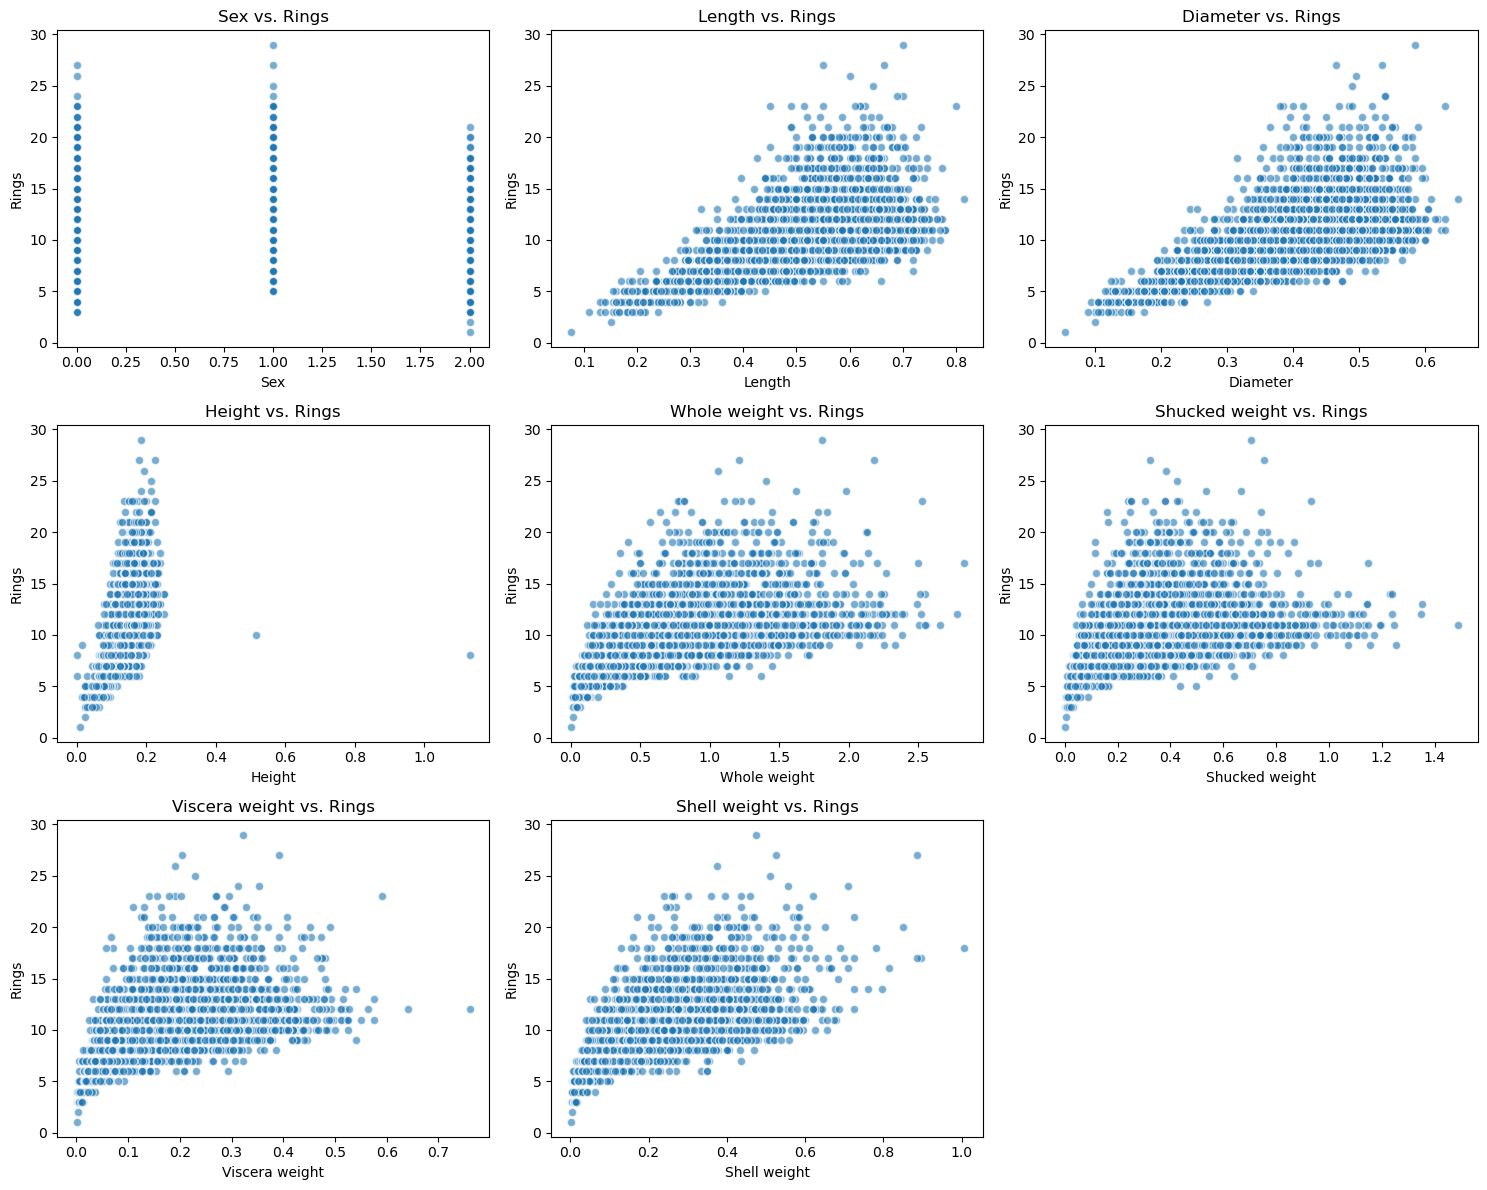

In [5]:
# Identify predictor columns (all columns except 'Rings')
predictor_columns = [col for col in df.columns if col != 'Rings']

# Determine grid size for subplots (e.g., 3 columns per row)
n_cols = 3
n_rows = (len(predictor_columns) + n_cols - 1) // n_cols  # Calculate required rows

# Create a figure for the subplots
plt.figure(figsize=(15, n_rows * 4))

# Loop through each predictor column and create a scatter plot against 'Rings'
for i, col in enumerate(predictor_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(df[col], df['Rings'], alpha=0.6, edgecolors='w')
    plt.xlabel(col)
    plt.ylabel('Rings')
    plt.title(f'{col} vs. Rings')

plt.tight_layout()
plt.show()


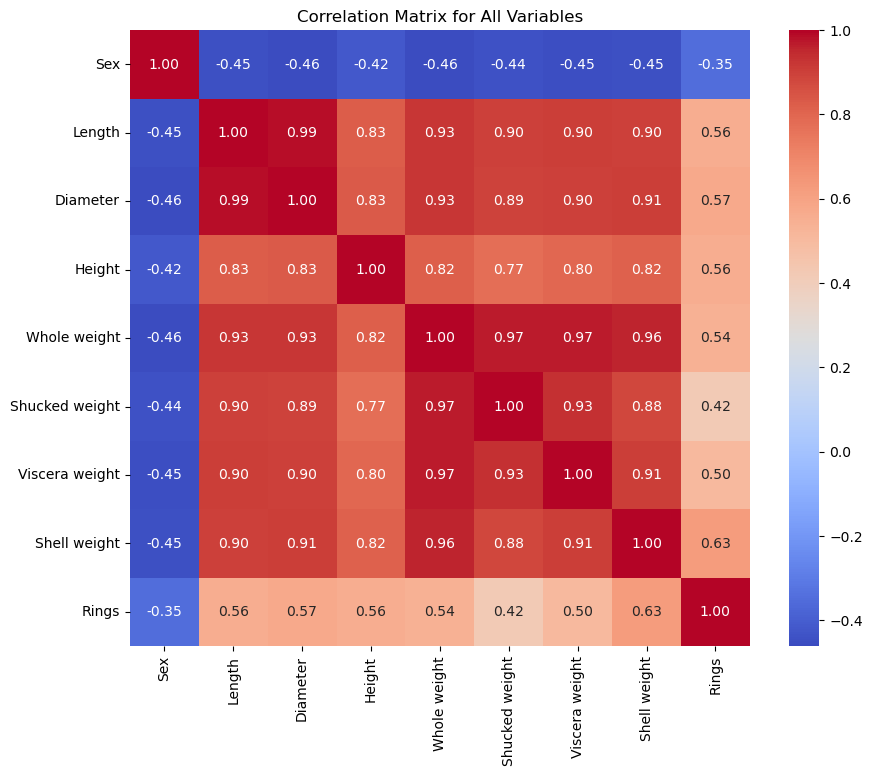

In [6]:
# Assuming 'df' is your DataFrame with all variables
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for All Variables")
plt.show()

In [7]:
# Separate the features and the target variable
X = df.drop('Rings', axis=1)
y = df['Rings']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42  # random_state ensures reproducibility
)

# Display the shape of the training and testing sets to verify the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2923, 8)
Testing set shape: (1254, 8)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Use the model to make predictions on the test set.
y_pred = model.predict(X_test)

In [10]:
#Evaluate the model's performance on the test set using metrics like Mean Squared Error (MSE) and R-squared.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 4.828273180654567
R^2 Score: 0.5245215536480998


In [11]:
import itertools
from sklearn.preprocessing import StandardScaler
# Separate the features and the target variable
X = df.drop('Rings', axis=1)
y = df['Rings']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Get the list of all predictor column names
predictor_columns = X.columns.tolist()

results = []

# Iterate over every non-empty combination of predictors
for r in range(1, len(predictor_columns) + 1):
    for combo in itertools.combinations(predictor_columns, r):
        # Select the subset of predictors for training and testing
        X_train_subset = X_train[list(combo)]
        X_test_subset = X_test[list(combo)]
        
        # Train the Linear Regression model on the current set of predictors
        model = LinearRegression()
        model.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test_subset)
        
        # Calculate evaluation metrics
        mse_val = mean_squared_error(y_test, y_pred)
        rmse_val = np.sqrt(mse_val)
        r2_val = r2_score(y_test, y_pred)
        
        # Append the results to the list
        results.append({
            'Predictors': combo,
            'Num_Predictors': len(combo),
            'MSE': mse_val,
            'RMSE': rmse_val,
            'R2': r2_val
        })

# Convert the results to a DataFrame for a neat display
results_df = pd.DataFrame(results)

# Optionally, sort the results by a chosen metric (for example, lowest RMSE)
results_df = results_df.sort_values(by='RMSE').reset_index(drop=True)
print(results_df)

                                            Predictors  Num_Predictors  \
0    (Sex, Diameter, Height, Whole weight, Shucked ...               7   
1    (Sex, Length, Diameter, Height, Whole weight, ...               8   
2    (Sex, Length, Height, Whole weight, Shucked we...               7   
3    (Sex, Diameter, Whole weight, Shucked weight, ...               6   
4    (Sex, Length, Diameter, Whole weight, Shucked ...               7   
..                                                 ...             ...   
250                   (Shucked weight, Viscera weight)               2   
251                                  (Viscera weight,)               1   
252                              (Sex, Shucked weight)               2   
253                                  (Shucked weight,)               1   
254                                             (Sex,)               1   

          MSE      RMSE        R2  
0    4.827554  2.197170  0.524592  
1    4.828273  2.197333  0.524522  
2  

In [12]:
from IPython.display import display

# Sort results by RMSE (if not already sorted)
results_df_sorted = results_df.sort_values(by='RMSE')

# Try using hide_index(); if not available, fall back to a default style.
try:
    styled_results = results_df_sorted.style.format({
        'MSE': '{:.2f}',
        'RMSE': '{:.2f}',
        'R2': '{:.3f}'
    }).hide_index()
except AttributeError:
    styled_results = results_df_sorted.style.format({
        'MSE': '{:.2f}',
        'RMSE': '{:.2f}',
        'R2': '{:.3f}'
    })

# Display the styled DataFrame
display(styled_results)


,Predictors,Num_Predictors,MSE,RMSE,R2
0,"('Sex', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight')",7,4.83,2.20,0.525
1,"('Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight')",8,4.83,2.20,0.525
2,"('Sex', 'Length', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight')",7,4.87,2.21,0.520
3,"('Sex', 'Diameter', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight')",6,4.89,2.21,0.519
4,"('Sex', 'Length', 'Diameter', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight')",7,4.89,2.21,0.518
5,"('Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Shell weight')",7,4.90,2.21,0.517
6,"('Sex', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Shell weight')",6,4.90,2.21,0.517
7,"('Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight')",7,4.92,2.22,0.515
8,"('Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight')",6,4.93,2.22,0.515
9,"('Sex', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight')",6,4.95,2.22,0.513


In [15]:
import statsmodels.api as sm

# Create the 'age' column as Rings * 1.5
df['age'] = df['Rings'] * 1.5

# Define the predictors and the response variable
predictors = ['Sex', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
X = df[predictors]
y = df['age']

# If 'Sex' is categorical and not already encoded, you may need to convert it to dummy variables.
# Uncomment the following two lines if that's the case:
# X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
  
# Add a constant to the predictors
X = sm.add_constant(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the OLS model using the training data
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     489.1
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:39:30   Log-Likelihood:                -7609.7
No. Observations:                2923   AIC:                         1.524e+04
Df Residuals:                    2915   BIC:                         1.528e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.8009      0.476     12.

In [17]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

# Create the 'age' column as Rings * 1.5
df['age'] = df['Rings'] * 1.5

# Define the predictors and the response variable
predictors = ['Sex', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
X = df[predictors]
y = df['age']

# If 'Sex' is categorical and not already encoded, you may need to convert it to dummy variables.
# Uncomment the following line if needed:
# X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Generate polynomial features (degree=2) for the predictors.
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Convert the polynomial features back into a DataFrame for clarity,
# using the feature names provided by PolynomialFeatures.
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names, index=X.index)

# Add a constant term for the intercept.
X_poly_df = sm.add_constant(X_poly_df)

# Split the dataset into training (70%) and testing (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.3, random_state=0)

# Fit the OLS model using the training data.
model = sm.OLS(y_train, X_train).fit()

# Print the model summary.
print(model.summary())

# Predict on the test set.
y_pred = model.predict(X_test)

# Compute the RMSE.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRoot Mean Squared Error (RMSE) on Test Set:", rmse)



                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:41:12   Log-Likelihood:                -7450.6
No. Observations:                2923   AIC:                         1.497e+04
Df Residuals:                    2887   BIC:                         1.519e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### KNN ###

In [12]:
from sklearn.neighbors import KNeighborsRegressor

predictors = ['Sex', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

X = df[predictors]
y = df['age']  # age defined as Rings * 1.5

# Split data (80% train, 20% test)
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

k = 5
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)

y_pred = knn_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 11.161435406698565


In [19]:
import itertools
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.display import display
from sklearn.preprocessing import StandardScaler

# Assume df is your DataFrame and it already includes the 'age' column defined as Rings * 1.5.
# Also, df should include these columns: 'Sex', 'Diameter', 'Height', 'Whole weight', 
# 'Shucked weight', 'Viscera weight', 'Shell weight'.

predictors = ['Sex', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Define X (predictors) and y (response variable, here 'age')
X = df[predictors]
y = df['age']

# Create a fixed train-test split (30% test, 70% train) for consistency across models.
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# List of k values to test
k_values = [1,2,3, 4, 5, 6, 7, 8, 9,10,15]

results = []

# Loop over all non-empty subsets of predictors.
for r in range(1, len(predictors) + 1):
    for subset in itertools.combinations(predictors, r):
        subset = list(subset)
        # Select the subset of predictors from the full training and test sets.
        X_train_subset = X_train_all[subset]
        X_test_subset = X_test_all[subset]
        # Loop over each k value.
        for k in k_values:
            knn_reg = KNeighborsRegressor(n_neighbors=k)
            knn_reg.fit(X_train_subset, y_train)
            y_pred = knn_reg.predict(X_test_subset)
            mse = mean_squared_error(y_test, y_pred)
            results.append({
                'Predictors': ', '.join(subset),
                'Num_Predictors': len(subset),
                'k': k,
                'MSE': mse
            })

# Convert results to a DataFrame.
results_df = pd.DataFrame(results)

# Optionally, sort the results by MSE (lowest MSE at the top).
results_df = results_df.sort_values(by='MSE').reset_index(drop=True)

# Format the results nicely in Jupyter Notebook.
styled_results = results_df.style.format({'MSE': '{:.2f}'})
display(styled_results)


,Predictors,Num_Predictors,k,MSE
0,"Sex, Diameter, Height, Whole weight, Shucked weight, Viscera weight",6,9,10.63
1,"Height, Whole weight, Shucked weight, Viscera weight",4,15,10.64
2,"Sex, Diameter, Height, Whole weight, Shucked weight, Viscera weight",6,8,10.65
3,"Diameter, Whole weight, Shucked weight, Viscera weight, Shell weight",5,15,10.69
4,"Sex, Diameter, Height, Whole weight, Shucked weight, Viscera weight",6,10,10.69
5,"Height, Whole weight, Shucked weight, Viscera weight",4,10,10.71
6,"Sex, Diameter, Height, Whole weight, Shucked weight, Viscera weight",6,7,10.71
7,"Diameter, Height, Whole weight, Shucked weight, Viscera weight",5,10,10.72
8,"Sex, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight",7,8,10.72
9,"Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight",6,15,10.75


c:\Users\hugoa\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hugoa\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hugoa\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


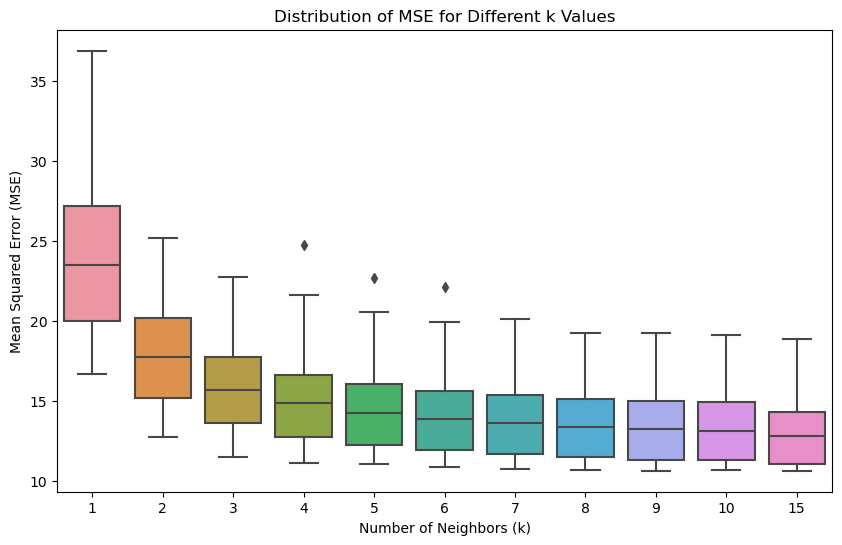

c:\Users\hugoa\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hugoa\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hugoa\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


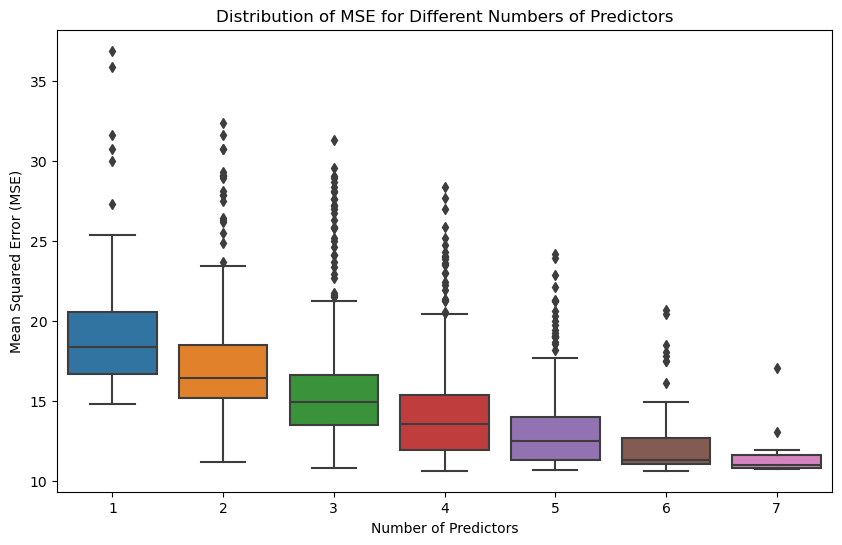

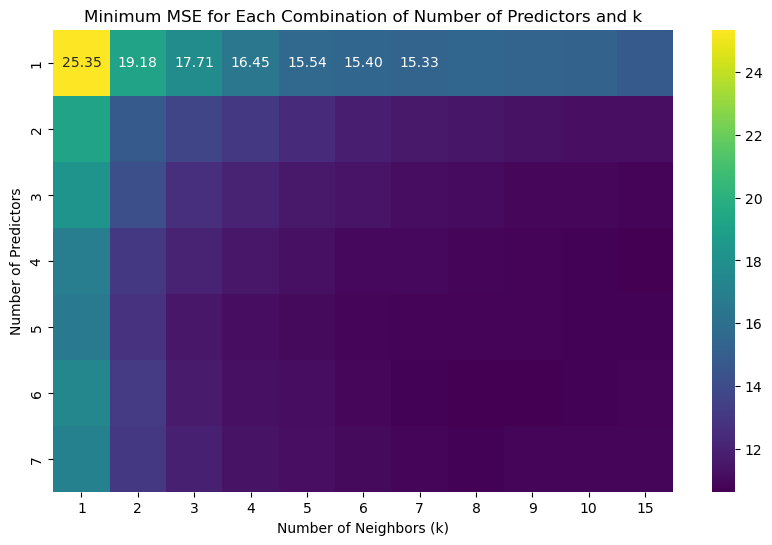

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume results_df is the DataFrame produced by your previous code,
# with columns: 'Predictors', 'Num_Predictors', 'k', and 'MSE'.

# Visualization 1: Boxplot of MSE vs. k
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='k', y='MSE')
plt.title("Distribution of MSE for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

# Visualization 2: Boxplot of MSE vs. Number of Predictors
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='Num_Predictors', y='MSE')
plt.title("Distribution of MSE for Different Numbers of Predictors")
plt.xlabel("Number of Predictors")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

# Visualization 3: Heatmap of Minimum MSE for each combination of Num_Predictors and k.
# First, create a pivot table: rows = Num_Predictors, columns = k, values = minimum MSE
pivot_table = results_df.groupby(['Num_Predictors', 'k'])['MSE'].min().reset_index().pivot(index='Num_Predictors', columns='k', values='MSE')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
plt.title("Minimum MSE for Each Combination of Number of Predictors and k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Number of Predictors")
plt.show()
